# Loading the data and exploring Wellness and Load data


In [1]:
import pandas as pd
from pandas.api.types import CategoricalDtype
from pathlib import Path

data_file = Path.cwd() / "data" / "WellnessLoadandResultsData.xlsx"

# Set categories for the "Sport Specific Training Volume" column
categories = ["Low", "Moderate", "High"]
cat_type = CategoricalDtype(categories=categories, ordered=True)
# Read the Excel file with the specified dtype
xls = pd.read_excel(data_file, sheet_name=["Wellness and Load", "Results", "Definitions"], dtype={"Sport Specific Training Volume": cat_type})

wellness_df = xls["Wellness and Load"]
results_df = xls["Results"]

# Display results per athlete
wellness_df.groupby("Athlete").describe()


Date                                                      \
          count                           mean                  min   
Athlete                                                               
Athlete 1    49  2023-06-23 22:02:26.938775552  2023-05-05 00:00:00   
Athlete 2    52  2023-06-23 16:09:13.846153728  2023-05-05 00:00:00   
Athlete 3    75            2023-06-21 00:19:12  2023-05-05 00:00:00   
Athlete 4   121  2023-07-08 03:46:06.942148864  2023-05-05 00:00:00   
Athlete 5    65  2023-06-10 19:34:09.230769152  2023-05-05 00:00:00   
Athlete 6   126  2023-07-12 07:02:51.428571392  2023-05-05 00:00:00   
Athlete 7    71  2023-07-04 05:24:30.422535168  2023-05-09 00:00:00   
Athlete 8   129  2023-07-12 23:26:30.697674496  2023-05-05 00:00:00   

                                                                          \
                           25%                  50%                  75%   
Athlete                                                                    
Athlete 1  2023-05-27 00:00:00  2023-06-11 00:00:00  2023-08-08 00:00:00   
Athlete 2  2023-05-21 12:00:00  2023-06-08 12:00:00  2023-08-03 00:00:00   
Athlete 3  2023-05-26 12:00:00  2023-06-18 00:00:00  2023-07-08 12:00:00   
Athlete 4  2023-06-06 00:00:00  2023-07-06 00:00:00  2023-08-06 00:00:00   
Athlete 5  2023-05-21 00:00:00  2023-06-06 00:00:00  2023-06-24 00:00:00   
Athlete 6  2023-06-07 06:00:00  2023-07-11 12:00:00  2023-08-15 18:00:00   
Athlete 7  2023-05-31 00:00:00  2023-07-04 00:00:00  2023-08-01 00:00:00   
Athlete 8  2023-06-09 00:00:00  2023-07-12 00:00:00  2023-08-16 00:00:00   

                                    Fatigue             ... Stress             \
                           max  std   count       mean  ...    max        std   
Athlete                                                 ...                     
Athlete 1  2023-08-28 00:00:00  NaN    49.0  48.836735  ...   84.0  19.078227   
Athlete 2  2023-09-11 00:00:00  NaN    52.0  46.153846  ...   98.0  28.892947   
Athlete 3  2023-08-30 00:00:00  NaN    75.0  33.306667  ...  100.0  30.810043   
Athlete 4  2023-09-19 00:00:00  NaN   121.0  18.603306  ...  100.0  20.979355   
Athlete 5  2023-08-15 00:00:00  NaN    65.0  42.707692  ...   82.0  13.445134   
Athlete 6  2023-09-20 00:00:00  NaN   126.0  40.452381  ...   88.0  18.648401   
Athlete 7  2023-09-19 00:00:00  NaN    71.0  32.690141  ...   67.0  19.297220   
Athlete 8  2023-09-20 00:00:00  NaN   129.0  38.992248  ...  100.0  23.001188   

          Travel Hours                                                 \
                 count       mean   min     25%     50%    75%    max   
Athlete                                                                 
Athlete 1         11.0   9.227273  2.00  4.7500   9.000  11.50  20.00   
Athlete 2          5.0  10.600000  3.25  4.5000  10.000  15.25  20.00   
Athlete 3          9.0   9.861111  2.50  5.2500   9.000  14.00  20.00   
Athlete 4         11.0   8.022727  2.50  3.0000   6.500  10.25  20.00   
Athlete 5         11.0   6.090909  2.00  3.2500   5.000   7.00  15.00   
Athlete 6         24.0   8.656250  2.25  3.5000   7.875  11.25  19.25   
Athlete 7         10.0   8.075000  2.00  2.6875   5.375  12.25  20.00   
Athlete 8         26.0   6.673077  2.00  2.6250   5.500   8.25  20.00   

                     
                std  
Athlete              
Athlete 1  5.806736  
Athlete 2  7.098856  
Athlete 3  6.301179  
Athlete 4  5.764606  
Athlete 5  4.115934  
Athlete 6  5.673553  
Athlete 7  7.060306  
Athlete 8  4.715278  

[8 rows x 72 columns]

## Cleaning wellness data:
No valid ranges are given for all the metrics in the Wellness data. However, resting HR of 0 is not possible for living people:
- Looking through the data, Athlete 1, 6, and 8 seem to have day they recorded 0 for HR resting. We will remove those rows.
- For all the other columns, we keep in mind the 0's might be realistic, or missing values defaulted to 0.

In [3]:
# remove all rows that have 0 for resting HR
print(len(wellness_df))
wellness_df = wellness_df[wellness_df["Resting HR"] != 0]
print(len(wellness_df))


688
645


In [4]:
# check how many rows per athlete we have
wellness_df["Athlete"].value_counts()

Athlete
Athlete 6    125
Athlete 8    124
Athlete 4    121
Athlete 3     75
Athlete 7     71
Athlete 5     65
Athlete 2     52
Athlete 1     12
Name: count, dtype: int64

## Data volume after cleaning
As seen above, athlete 1 had most of the 43 rows with missing HR data. Athlete 1 has by far the lowest data volume. 
- This disparity in data volume per athlete makes me suspect all other values are likely to be true (otherwise it would be a missing date?)
- Might want to not delete all the Resting HR rows for athlete 1, but ignore relevant information related to HR for this athlete.

## Categories for "Sport Specific Training Volume"

In [43]:
# Group by 'Athlete' and count the occurrences of each category in 'Sport Specific Training Volume'
category_counts = wellness_df.groupby("Athlete")["Sport Specific Training Volume"].value_counts(dropna=False).unstack(fill_value=0)

# Print the result
print(category_counts)

Sport Specific Training Volume  NaN  Low  Moderate  High
Athlete                                                 
Athlete 1                        23    0        16    10
Athlete 2                        25    4        18     5
Athlete 3                        42    0        19    14
Athlete 4                        64    9        41     7
Athlete 5                        26    4        29     6
Athlete 6                        62    1        47    16
Athlete 7                        32    1        28    10
Athlete 8                        68    6        43    12


# Exploring race results

In [44]:
# Give overview of the data per athlete
results_df.groupby("Athlete").describe()

Date                                            \
          count                 mean                  min   
Athlete                                                     
Athlete 1     8  2023-07-26 21:00:00  2023-06-09 00:00:00   
Athlete 2    10  2023-06-28 21:36:00  2023-05-19 00:00:00   
Athlete 3     9  2023-07-23 02:40:00  2023-06-09 00:00:00   
Athlete 4    12  2023-07-06 04:00:00  2023-05-19 00:00:00   
Athlete 5     8  2023-07-08 09:00:00  2023-06-02 00:00:00   
Athlete 6    10  2023-07-15 02:24:00  2023-06-02 00:00:00   
Athlete 7    12  2023-07-09 02:00:00  2023-05-19 00:00:00   
Athlete 8     8  2023-07-28 18:00:00  2023-06-09 00:00:00   

                                                                          \
                           25%                  50%                  75%   
Athlete                                                                    
Athlete 1  2023-07-07 00:00:00  2023-07-31 12:00:00  2023-08-19 12:00:00   
Athlete 2  2023-06-02 06:00:00  2023-06-10 12:00:00  2023-07-13 18:00:00   
Athlete 3  2023-06-22 00:00:00  2023-07-28 00:00:00  2023-08-18 00:00:00   
Athlete 4  2023-06-02 18:00:00  2023-06-27 00:00:00  2023-08-11 06:00:00   
Athlete 5  2023-06-19 18:00:00  2023-07-03 00:00:00  2023-07-29 18:00:00   
Athlete 6  2023-06-21 06:00:00  2023-07-13 12:00:00  2023-08-07 12:00:00   
Athlete 7  2023-06-12 12:00:00  2023-07-02 12:00:00  2023-08-11 06:00:00   
Athlete 8  2023-07-07 00:00:00  2023-07-31 12:00:00  2023-08-23 00:00:00   

                                    Time: Athlete              ...  \
                           max  std         count        mean  ...   
Athlete                                                        ...   
Athlete 1  2023-09-07 00:00:00  NaN           8.0  341.107500  ...   
Athlete 2  2023-09-08 00:00:00  NaN           8.0  323.017500  ...   
Athlete 3  2023-09-08 00:00:00  NaN           9.0  345.120000  ...   
Athlete 4  2023-09-08 00:00:00  NaN           9.0  329.850000  ...   
Athlete 5  2023-08-18 00:00:00  NaN           4.0  315.030000  ...   
Athlete 6  2023-09-08 00:00:00  NaN          10.0  293.967000  ...   
Athlete 7  2023-09-08 00:00:00  NaN          11.0  324.250909  ...   
Athlete 8  2023-09-08 00:00:00  NaN           6.0  355.010000  ...   

          Split Time: Athlete Heat 2           Split Rank: Athlete Heat 2  \
                                 max       std                      count   
Athlete                                                                     
Athlete 1                      16.77  0.940098                        8.0   
Athlete 2                      14.97  0.390082                        8.0   
Athlete 3                      17.79  0.976268                        9.0   
Athlete 4                      15.39  0.496362                        9.0   
Athlete 5                      15.45  1.287410                        4.0   
Athlete 6                      16.92  0.933785                        8.0   
Athlete 7                      16.05  0.825131                       11.0   
Athlete 8                      18.96  1.286775                        6.0   

                                                                
                mean   min    25%   50%    75%   max       std  
Athlete                                                         
Athlete 1   3.000000   1.0   2.00   2.5   4.00   6.0  1.603567  
Athlete 2   5.250000   1.0   2.00   3.0   8.75  12.0  4.399675  
Athlete 3  20.333333  17.0  20.00  20.0  21.00  23.0  1.658312  
Athlete 4  10.333333   5.0   6.00   9.0  14.00  20.0  5.099020  
Athlete 5   9.750000   6.0   7.50  10.0  12.25  13.0  3.304038  
Athlete 6   7.000000   2.0   3.00   4.0  11.75  15.0  5.398412  
Athlete 7  14.181818   7.0  12.00  14.0  17.00  23.0  4.707827  
Athlete 8   8.833333   6.0   6.25   7.5   8.75  17.0  4.167333  

[8 rows x 96 columns]

In [45]:
# Check how many athletes were at the same meets (data and time best equal)
results_df.groupby("Time: Best").value_counts()

Time: Best  Date        Athlete    Event    Time: Athlete  Rank: Athlete  Time: Athlete Heat 1  Time: Best Heat 1  Split Time: Athlete Heat 1  Split Rank: Athlete Heat 1  Time: Athlete Heat 2  Time: Best Heat 2  Split Time: Athlete Heat 2  Split Rank: Athlete Heat 2
192.87      2023-06-02  Athlete 5  Men's    197.61         20             98.85                 96.36              12.93                       11                          98.76                 96.39              12.81                       6.0                           1
                        Athlete 7  Men's    196.83         17             98.19                 96.36              12.99                       15                          98.64                 96.39              12.96                       11.0                          1
198.87      2023-06-02  Athlete 6  Women's  204.42         14             100.86                99.21              13.68                       5                           103.56            

# Combining the two sheets

## Practise makes perfect?
- Take a competition date from the results data
- Look in the wellness data for the closest preceding travel day (assumed this was the travel to the race)
- From that day, till the competition day, check how many days of training volume

No travel day found for athlete Athlete 2 for competition on 2023-05-19 00:00:00
No travel day found for athlete Athlete 4 for competition on 2023-05-19 00:00:00
No travel day found for athlete Athlete 7 for competition on 2023-05-19 00:00:00
No travel day found for athlete Athlete 2 for competition on 2023-05-20 00:00:00
No travel day found for athlete Athlete 4 for competition on 2023-05-20 00:00:00
No travel day found for athlete Athlete 7 for competition on 2023-05-20 00:00:00
No travel day found for athlete Athlete 2 for competition on 2023-06-02 00:00:00
No travel day found for athlete Athlete 2 for competition on 2023-06-03 00:00:00
No travel day found for athlete Athlete 2 for competition on 2023-06-10 00:00:00
No travel day found for athlete Athlete 2 for competition on 2023-06-11 00:00:00


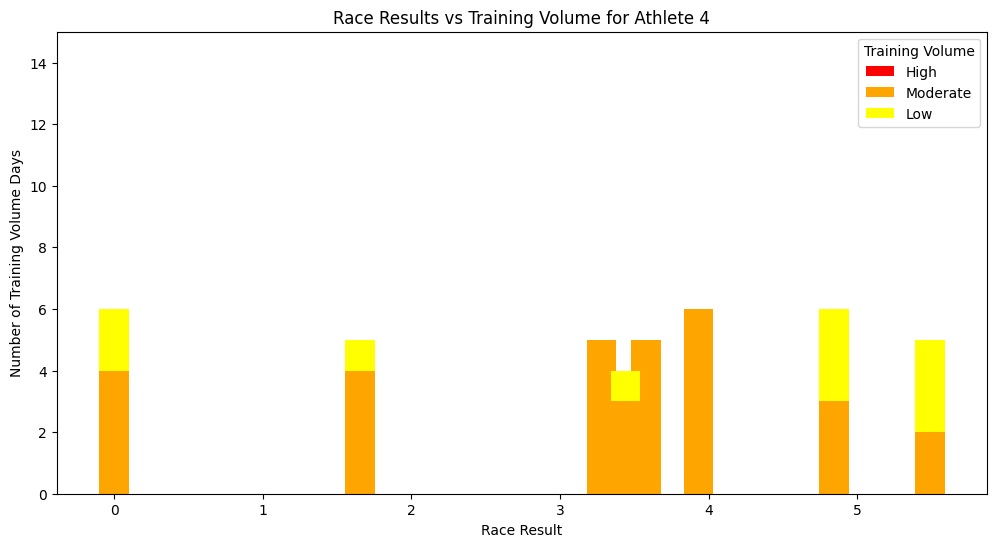

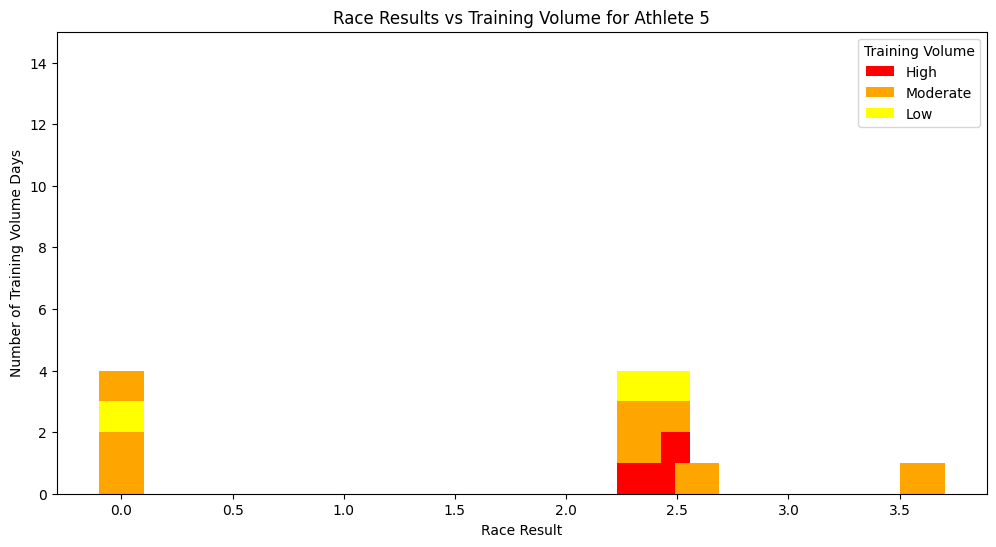

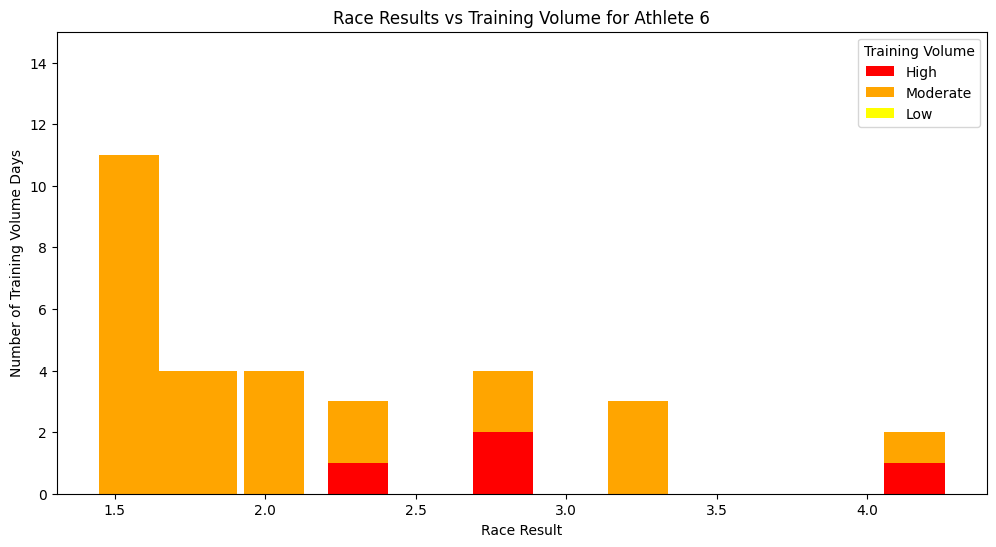

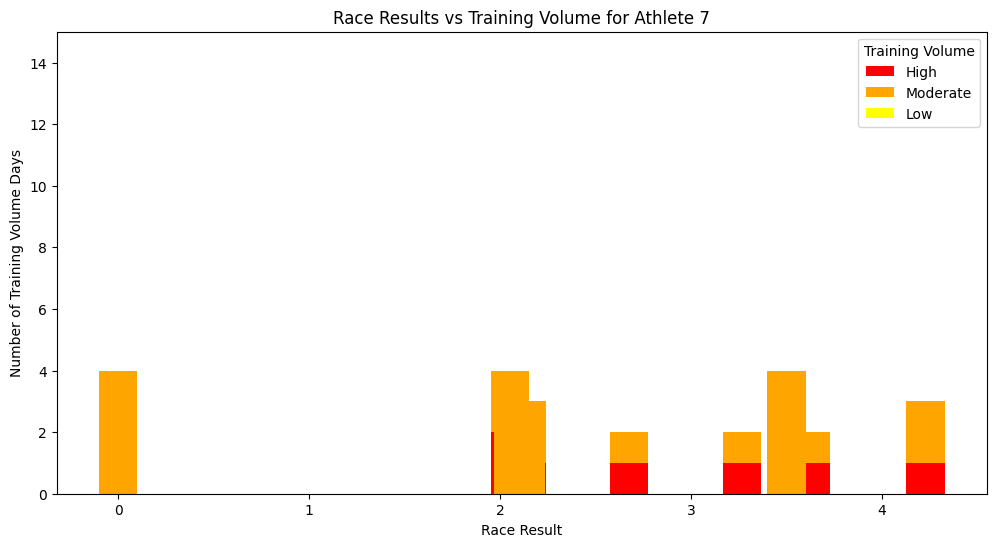

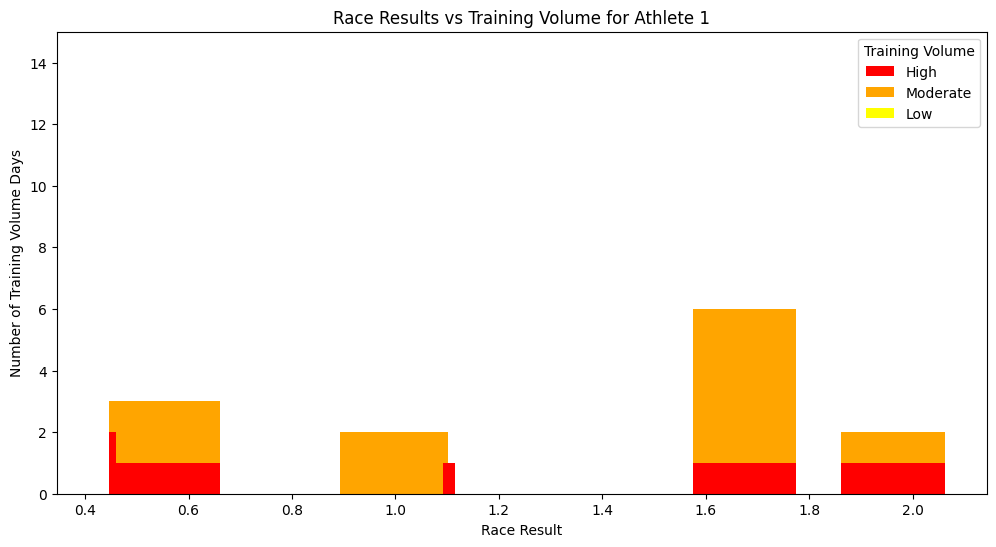

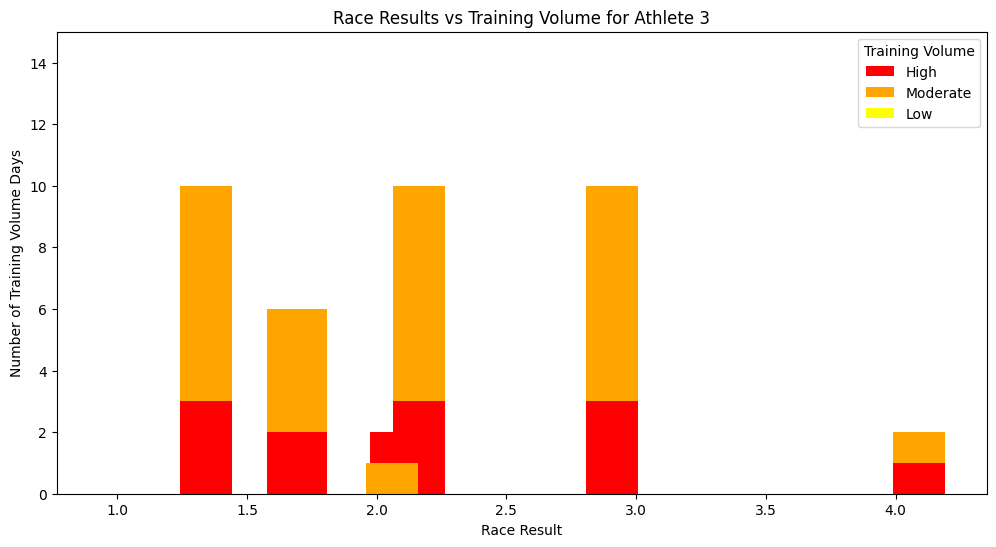

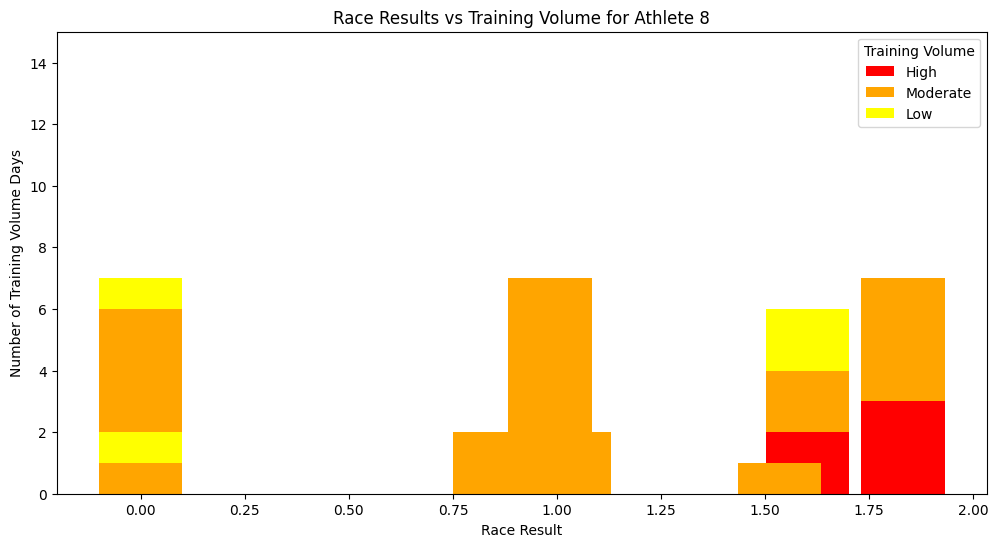

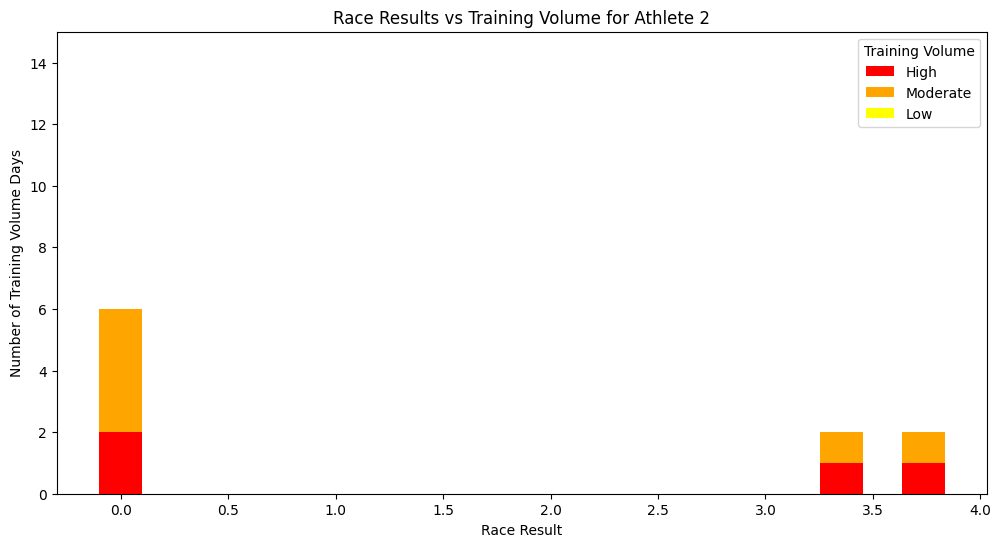

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming wellness_df and results_df are already loaded as per your provided code

# Step 1: Aggregate training volume data dynamically based on travel day
def aggregate_training_volume(wellness_df, results_df):
    training_data = []
    for _, row in results_df.iterrows():
        athlete = row["Athlete"]
        competition_date = row["Date"]
        # Find the closest preceding travel day
        try:
            travel_day = wellness_df[(wellness_df["Athlete"] == athlete) &
                                     (wellness_df["Travel Hours"] > 0) &
                                     (wellness_df["Date"] < competition_date)].sort_values("Date").iloc[-1]
        except IndexError:
            print(f"No travel day found for athlete {athlete} for competition on {competition_date}")
            continue

        # Calculate the days of training volume
        training_days = wellness_df[(wellness_df["Athlete"] == athlete) &
                                    (wellness_df["Date"] >= travel_day["Date"]) &
                                    (wellness_df["Date"] <= competition_date)]
        # Count the occurrences of each training volume category
        volume_counts = training_days["Sport Specific Training Volume"].value_counts()
        volume_counts["Athlete"] = athlete
        volume_counts["Competition Date"] = competition_date
        # volume_counts["Result"] = row["Rank: Athlete"]
        # Take percentage away from winning time as results:
        volume_counts["Result"] = (row["Time: Athlete"] - row["Time: Best"]) / row["Time: Best"] * 100
        training_data.append(volume_counts)

    return pd.DataFrame(training_data).fillna(0)

# Step 2: Merge the data
aggregated_data = aggregate_training_volume(wellness_df, results_df)

# Step 3: Visualize the data using a stacked bar chart
athletes = aggregated_data["Athlete"].unique()
for athlete in athletes:
    athlete_data = aggregated_data[aggregated_data["Athlete"] == athlete]
    athlete_data = athlete_data.sort_values("Result")

    # Convert 'Result' to a categorical type to ensure proper sorting
    athlete_data["Result"] = pd.Categorical(athlete_data["Result"], categories=athlete_data["Result"].unique(), ordered=True)

    # Create the stacked bar chart
    plt.figure(figsize=(12, 6))
    plt.bar(athlete_data["Result"], athlete_data["High"], width=0.2, label="High", color="red")
    plt.bar(athlete_data["Result"], athlete_data["Moderate"],width=0.2, bottom=athlete_data["High"], label="Moderate", color="orange")
    plt.bar(athlete_data["Result"], athlete_data["Low"], width=0.2, bottom=athlete_data["High"] + athlete_data["Moderate"], label="Low", color="yellow")

    plt.title(f"Race Results vs Training Volume for {athlete}")
    plt.xlabel("Race Result")
    plt.ylabel("Number of Training Volume Days")
    plt.ylim(0, 15)
    plt.legend(title="Training Volume")
    plt.show()

In [ ]:
for _, row in results_df.iterrows():
    athlete = row["Athlete"]
    if athlete != "Athlete 1":
        continue
    competition_date = row["Date"]
    # find the closest preceding travel day
    try: 
        travel_day = wellness_df[(wellness_df["Athlete"] == athlete) & (wellness_df["Travel Hours"] >0) & (wellness_df["Date"] < competition_date)].sort_values("Date").iloc[-1]
    except IndexError:
        print(f"No travel day found for athlete {athlete} for competition on {competition_date}")
        continue
    print (f"{athlete} travelled (presumably) to competition venue {competition_date - travel_day['Date']} days beforehand \n traveling on {travel_day['Date']} for competing on {competition_date}")
    # If travel date is used for other competition; don't assume same venue
    if True:
        pass
    # calculate the days of training volume
    training_days = wellness_df[(wellness_df["Athlete"] == athlete) & (wellness_df["Date"] >= travel_day["Date"]) & (wellness_df["Date"] <= competition_date)]
    specific_volume = []
    for _, training_day in training_days.iterrows():
        print(f"Training day {training_day['Date']}: {training_day['Sport Specific Training Volume']}")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming wellness_df and results_df are already loaded as per your provided code

# Step 1: Aggregate training volume data dynamically based on travel day
def aggregate_training_volume(wellness_df, results_df):
    training_data = []
    for _, row in results_df.iterrows():
        athlete = row["Athlete"]
        competition_date = row["Date"]
        # Find the closest preceding travel day
        try:
            travel_day = wellness_df[(wellness_df["Athlete"] == athlete) & 
                                     (wellness_df["Travel Hours"] > 0) & 
                                     (wellness_df["Date"] < competition_date)].sort_values("Date").iloc[-1]
        except IndexError:
            print(f"No travel day found for athlete {athlete} for competition on {competition_date}")
            continue
        
        # Calculate the days of training volume
        training_days = wellness_df[(wellness_df["Athlete"] == athlete) & 
                                    (wellness_df["Date"] >= travel_day["Date"]) & 
                                    (wellness_df["Date"] <= competition_date)]
        # Count the occurrences of each training volume category
        volume_counts = training_days["Sport Specific Training Volume"].value_counts()
        volume_counts["Athlete"] = athlete
        volume_counts["Competition Date"] = competition_date
        volume_counts["Result"] = row["Rank: Athlete"]  
         # Take percentage away from winning time as results:
        # volume_counts["Result"] = row["Time: Best"] - row["Time: Athlete"]
        training_data.append(volume_counts)

    return pd.DataFrame(training_data).fillna(0)

# Step 2: Merge the data
aggregated_data = aggregate_training_volume(wellness_df, results_df)

# Step 3: Visualize the data using a stacked bar chart
athletes = aggregated_data["Athlete"].unique()
for athlete in athletes:
    athlete_data = aggregated_data[aggregated_data["Athlete"] == athlete]
    athlete_data = athlete_data.sort_values("Result")

    # Create the stacked bar chart
    plt.figure(figsize=(12, 6))
    plt.bar(athlete_data["Result"], athlete_data["High"], label="High", color="red")
    plt.bar(athlete_data["Result"], athlete_data["Moderate"], bottom=athlete_data["High"], label="Moderate", color="orange")
    plt.bar(athlete_data["Result"], athlete_data["Low"], bottom=athlete_data["High"] + athlete_data["Moderate"], label="Low", color="yellow")

    plt.title(f"Race Results vs Training Volume for {athlete}")
    plt.xlabel("Race Result")
    plt.ylabel("Number of Training Volume Days")
    plt.ylim(0, 10)
    plt.legend(title="Training Volume")
    plt.show()